In [5]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.decomposition import PCA


In [3]:
audio_path = 'audio/000/000046_3840.ogg'

c:\Users\bear_\anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
c:\Users\bear_\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
c:\Users\bear_\anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


AttributeError: module 'matplotlib.pyplot' has no attribute 'ylabelA'

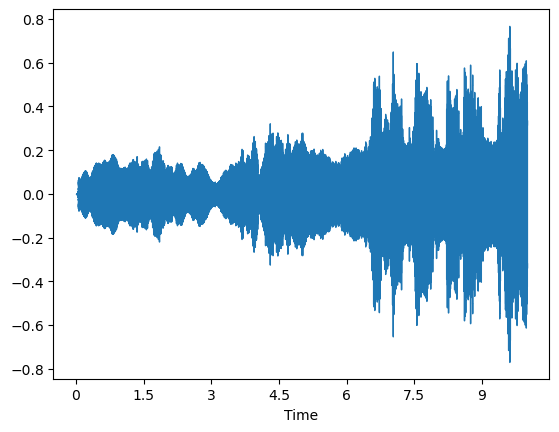

In [4]:
audio, fs = librosa.load(audio_path)
librosa.display.waveshow(audio)
plt.ylabelA("Amplitude")
plt.show()

In [14]:
audio_dir = 'audio/000/'
files = sorted(os.listdir(audio_dir))[:5]
mel_specs = []

for file in files:
    file_path = os.path.join(audio_dir, file)
    audio, fs = librosa.load(file_path)
    mel_spec = librosa.feature.melspectrogram(y=audio, sr=fs)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    mel_specs.append(mel_spec_db.flatten())

mel_specs_array = np.array(mel_specs)
n_samples, n_features = mel_specs_array.shape
n_components = min(5, n_features)  
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(mel_specs_array)
results = list(zip(files, principal_components))


In [15]:
np.savetxt("pca_results.txt", [f"{file} {list(pc)}" for file, pc in results], fmt="%s")
print("PCA results saved to pca_results.txt")

PCA results saved to pca_results.txt
